# **ติดตั้ง library UCI Machine Learning Repository ที่ใช้สำหรับ โหลดชุดข้อมูล**

In [ ]:
pip install ucimlrepo

# **Import ชุดข้อมูล Chronic Kidney Disease**

In [ ]:
import pandas as pd #pandas ใช้จัดการข้อมูลในรูปแบบตาราง
from ucimlrepo import fetch_ucirepo # import ฟังก์ชันชื่อ fetch_ucirepo จากไลบรารี ucimlrepo

CKD = fetch_ucirepo(id=336) # CKD คือ ชุดข้อมูล Chronic Kidney Disease

x = CKD.data.features # x เก็บข้อมูลตัวแปร input เข้าโมเดล
y = CKD.data.targets # yเก็บผลว่าเป็นหรือไม่เป็นโรคไต

df = pd.concat([x, y], axis=1) # รวม x และ y เป็นตารางเดียวด้วย pandas

print(CKD.metadata) #รายละเอียดชุดข้อมูล id ชื่อ แหล่งที่มา
print(CKD.variables) # เกี่ยวกับตัวแปร ชื่อ ประเภท คำอธิบาย

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

# **Data Collection & Preprocessing**

In [ ]:
pd.set_option('display.max_rows', None)      # แสดงทุกแถว
pd.set_option('display.max_columns', None)   # แสดงทุกคอลัมน์
print("Full Data Set")
print(df)

Full Data Set
      age     bp     sg   al   su       rbc        pc         pcc          ba  \
0    48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent  notpresent   
1     7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent  notpresent   
2    62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3    48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4    51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
5    60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent  notpresent   
6    68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent  notpresent   
7    24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent   
8    52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent   
9    53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present  notpresent   
10   50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present  notpresent   
11   63.0   70

# **Missing values**
เช็คว่ามีค่าหายไป/ว่าง เยอะไหม โดยค่าที่หายไปในชุดข้อมูลถูกใส่เป็น NaN อยู่แล้ว

In [ ]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [ ]:
df.dtypes #เช็คประเภท ว่ามีอะไร เป็น Numeric(float64) และ Categorical(object) บ้าง

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


# **จัดการเช็คค่าที่มีใน** กลุ่ม **Categorica**l ก่อน เพื่อแก้ไขให้ไปในทิศทางเดียวกัน

In [ ]:
categorical_col = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i in categorical_col:
    print( i , df[i].dropna().unique()) #ใช้ for loop วน จนครบทุกคอลัม เพื่อแสดงผลค่าที่ ไม่ซ้ำออกมา

rbc ['normal' 'abnormal']
pc ['normal' 'abnormal']
pcc ['notpresent' 'present']
ba ['notpresent' 'present']
htn ['yes' 'no']
dm ['yes' 'no' '\tno']
cad ['no' 'yes']
appet ['good' 'poor']
pe ['no' 'yes']
ane ['no' 'yes']


In [ ]:
#หลังพบว่า dm (โรคเบาหวาน) มีค่าตัวนึงเป็น  \tno ต้อง แก้ไขให้เป็น no ก่อน
df['dm'] = df['dm'].replace('\tno', 'no')

# เช็ค Missing values เฉพาะในกลุ่ม **numeric **แยกอีกทีเพื่อความง่ายในการเช็ค

In [ ]:
numeric_col = df.select_dtypes(include='number').columns #เลือกคอลัมที่เป็น number เก็บไว้ในตัวแปร
print(df[numeric_col].isnull().sum()) #แสดงผลว่าแต่ละคอลัมพบค่าว่างกี่เรคคอร์ด


age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64


# **Fill Missing Values**
เติมค่าที่หายไป

In [ ]:
#mode คือค่าที่พบมากที่สุดในคอลัมนั้นๆ เพื่อที่จะนำมาเติมในค่าที่หายไป
for col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace=True) # [0] คือ mode ตัวแรกที่พบ (เผื่อกรณีพบ mode มากว่า1)
    # inplace คือแก้ไขและแทนที่ใน Data Frame ไปเลย

/tmp/ipython-input-1678562310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True) # [0] คือ mode ตัวแรกที่พบ (เผื่อกรณีพบ mode มากว่า1)


In [ ]:
for col in numeric_col:
    df[col].fillna(df[col].median(), inplace=True) #median คือค่ากลางของข้อมูลเมื่อเรียงจากน้อยไปมาก
    # ให้นำมาเติมช่องที่ว่าง ดีกว่าค่า mean(ค่าเฉลี่ย) เพราะถ้าค่าอื่นๆในคอลัมเบนไปทางค่าสูง/ต่ำ แล้วเฉลี่ยออกมาแล้วอาจะ bias มีผลต่อการวินิจฉัยโรค

/tmp/ipython-input-3678238380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) #median คือค่ากลางของข้อมูลเมื่อเรียงจากน้อยไปมาก


In [ ]:
df.isnull().sum() #ค่าที่ missing ก่อนหน้านี้ถูกเติมแล้ว

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0



# **Mapping Categorical Variables**
แปลงค่าตัวหนังสือเป็นตัวเลข 0,1 เนื่องจากลอง Encode แล้วได้ค่าออกมาเป็นเลขทศนิยมอื่นที่ไม่ใช่ 0 1 เอามาใช้ในโมเดลไม่ได้

In [ ]:
binary_map = {
    'rbc': {'abnormal': 0, 'normal': 1},
    'pc': {'abnormal': 0, 'normal': 1},
    'pcc': {'notpresent': 0, 'present': 1},
    'ba': {'notpresent': 0, 'present': 1},
    'htn': {'no': 0, 'yes': 1},
    'dm': {'no': 0, 'yes': 1},
    'cad': {'no': 0, 'yes': 1},
    'appet': {'poor': 0, 'good': 1},
    'pe': {'no': 0, 'yes': 1},
    'ane': {'no': 0, 'yes': 1}
} #กำหนดไว้เลย ว่า ค่าไหน เป็นกับไม่เป็น ดีกับแย่ ให้เป็นแค่ 0 กับ 1

for i, mapping in binary_map.items(): #ลูปแล้วแปลงทั้งหมด
    df[i] = df[i].map(mapping)

In [ ]:
print(df.head())

    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr    bu   sc    sod  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  36.0  1.2  138.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  18.0  0.8  138.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  53.0  1.8  138.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  56.0  3.8  111.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  26.0  1.4  138.0   

   pot  hemo   pcv    wbcc  rbcc  htn  dm  cad  appet  pe  ane class  
0  4.4  15.4  44.0  7800.0   5.2    1   1    0      1   0    0   ckd  
1  4.4  11.3  38.0  6000.0   4.8    0   0    0      1   0    0   ckd  
2  4.4   9.6  31.0  7500.0   4.8    0   1    0      0   0    1   ckd  
3  2.5  11.2  32.0  6700.0   3.9    1   0    0      0   1    1   ckd  
4  4.4  11.6  35.0  7300.0   4.6    0   0    0      1   0    0   ckd  


# Outlier





In [ ]:
import numpy as np #นำเข้าไลบรารี numpy ซึ่งใช้สำหรับจัดการข้อมูลตัวเลข

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข ได้ DataFrame ใหม่ชื่อ X_numeric
X_numeric = x.select_dtypes(include=[np.number])

# ตรวจสอบ outlier ด้วย IQR โดย IQR ใช้กับข้อมูลเชิงปริมาณเท่านั้น
Q1 = X_numeric.quantile(0.25) #ควอไทล์ล่าง คือค่าที่ต่ำกว่า25%ของข้อมูล
Q3 = X_numeric.quantile(0.75) ##ควอไทล์บน คือค่าที่ต่ำกว่า75%ของข้อมูล
IQR = Q3 - Q1 #เพื่อกำหนดช่วงค่าที่ปกติ

outliers = ((X_numeric < (Q1 - 1.5 * IQR)) | (X_numeric > (Q3 + 1.5 * IQR))).sum()
print("จำนวน outlier :") #(Q1 - 1.5 * IQR) คือขอบล่าง (Q3 + 1.5 * IQR) คือขอบบน ถ้ามากกว่าขอบล่างหรือมากกว่าขอบบน = outlier
print(outliers)


จำนวน outlier :
age     10
bp      36
sg       0
al       0
su      61
bgr     34
bu      38
sc      51
sod     16
pot      4
hemo     1
pcv      1
wbcc    10
rbcc     1
dtype: int64


Data overview (ก่อนทำ preprocessing)

In [ ]:
print("ข้อมูลทั้งหมด:")
print(df.head())
print("\nข้อมูลสรุป:")
print(df.info())
print("\nค่าทางสถิติ:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

ข้อมูลทั้งหมด:
    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr    bu   sc    sod  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  36.0  1.2  138.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  18.0  0.8  138.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  53.0  1.8  138.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  56.0  3.8  111.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  26.0  1.4  138.0   

   pot  hemo   pcv    wbcc  rbcc  htn  dm  cad  appet  pe  ane class  
0  4.4  15.4  44.0  7800.0   5.2    1   1    0      1   0    0   ckd  
1  4.4  11.3  38.0  6000.0   4.8    0   0    0      1   0    0   ckd  
2  4.4   9.6  31.0  7500.0   4.8    0   1    0      0   0    1   ckd  
3  2.5  11.2  32.0  6700.0   3.9    1   0    0      0   1    1   ckd  
4  4.4  11.6  35.0  7300.0   4.6    0   0    0      1   0    0   ckd  

ข้อมูลสรุป:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data column

# Distribution
ดูการกระจายตัวของข้อมูล เพื่อดูลักษณะข้อมูลเชิงปริมาณก่อนทำ modeling

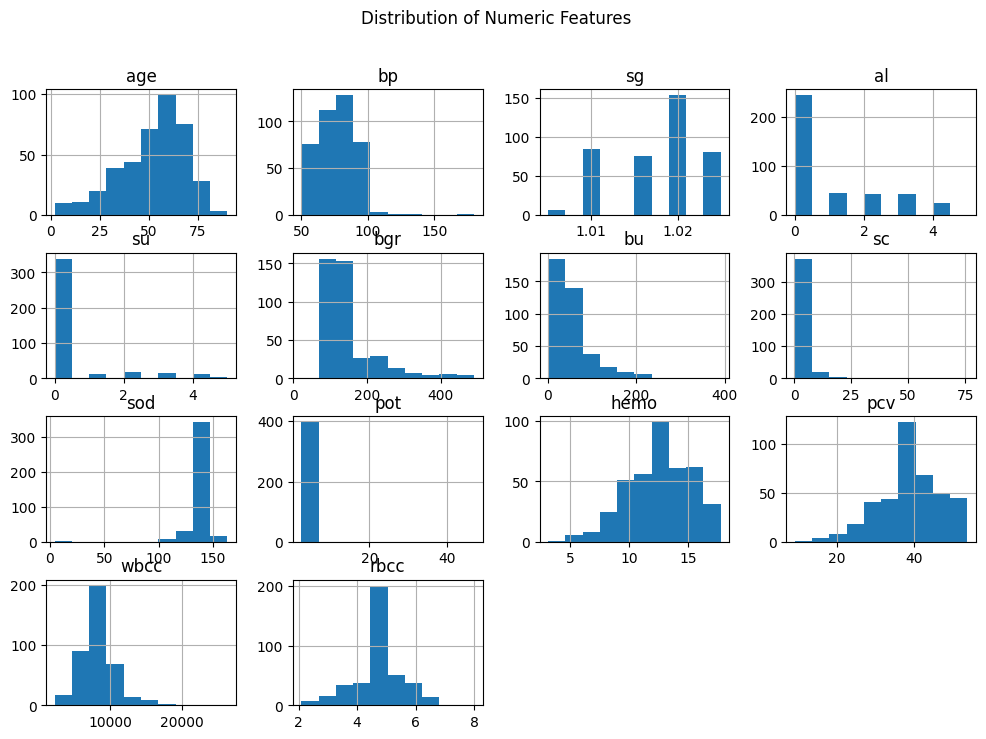

In [ ]:
import matplotlib.pyplot as plt #ไลบรารี Matplotlib สำหรับการสร้างกราฟ

df[numeric_col].hist(figsize=(12, 8)) #วาด Histogram ของแต่ละคอลัมน์ กว้าง 12 สูง 8 นิ้ว
plt.suptitle("Distribution of Numeric Features")
plt.show() #แสดงผล



# **Normalize ข้อมูลตัวเลข**
(ทำให้สเกลของข้อมูลเท่ากัน)

In [ ]:
from sklearn.preprocessing import StandardScaler #นำเข้าเพื่อปรับค่าตัวเลขให้ mean = 0 และ standard deviation = 1 ทำให้แต่ละ feature อยู่ในสเกลเดียวกัน ลด bias
scaler = StandardScaler() #สร้าง instance ใช้fit ข้อมูลและ transform ค่าในขั้นตอนเดียว
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) #คำนวณ mean และ standard แล้วแปลงค่าของคอลัมให้เป็นค่าz-score

# Feature Selection (เลือกเฉพาะตัวแปรที่สำคัญ)
ใช้ได้หลายวิธี เช่น
Mutual Information (MI) คือค่าที่วัดว่า feature แต่ละตัวมีความสัมพันธ์กับ target มากแค่ไหน

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('class', axis=1) #ลบคอลัมน์ class ออกจาก X เหลือแต่ ข้อมูลตัวแปรอิสระ หรือ features
y = df['class'] #target (class)

mi = mutual_info_classif(X, y) #mi แสดงผลเป็น array ของค่าความสำคัญ ดูว่า feature ช่วยในการทำนายมากไหม
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False) #แปลง array เป็น pandas Series ตั้งให้ index = x.columns
#เรียงจาก feature สำคัญที่สุดไปน้อยที่สุด
print(mi_series)

hemo     0.435196
pcv      0.415704
sc       0.370976
rbcc     0.370621
sg       0.316632
al       0.268115
sod      0.246778
dm       0.238583
htn      0.237771
pot      0.181967
bgr      0.158367
bu       0.147480
appet    0.133324
bp       0.132764
pe       0.123836
su       0.121926
ba       0.108021
wbcc     0.106582
cad      0.103178
pc       0.088594
pcc      0.086913
ane      0.076989
rbc      0.072995
age      0.053857
dtype: float64


# **แบ่งข้อมูลและฝึกโมเดล Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split #แบ่ง dataset เป็น training set และ test set
from sklearn.linear_model import LogisticRegression

#features (ตัวแปร input) target คือเป็นกับไม่เป็น (0,1) test_size คือ 20% ของข้อมูลใช้เป็นชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล โมเดลของเราช
model = LogisticRegression(max_iter=1000) #จำนวนรอบสูงสุดในการปรับ weight
model.fit(X_train, y_train) #เรียนรู้ ความสัมพันธ์ระหว่าง features และ target

LogisticRegression(max_iter=1000)

# **ประเมินผลโมเดล Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score ใช้วัดความแม่นยำของโมเดล  (จำนวนถูก / จำนวนทั้งหมด)
#confusion_matrix  ตารางแสดง จำนวนจริง และ จำนวนที่โมเดลทำนาย แสดง TP, TN, FP, FN

#ใช้ model ที่ฝึกแล้ว ทำนายค่า target และy_pred  array ของค่าที่โมเดลทำนาย (0/1)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)) #เปรียบเทียบ y_test (ค่าจริง) กับ y_pred (ค่าทำนาย)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) #แสดง Confusion Matrix
print("Report:\n", classification_report(y_test, y_pred)) #แสดง Classification Report

Accuracy: 1.0
Confusion Matrix:
 [[52  0]
 [ 0 28]]
Report:
               precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# **ขั้นตอนการทดสอบโมเดล**

## **โดยเราจะสร้างตัวอย่าง: การสร้างข้อมูลจำลอง เพื่อทดสอบโมเดล Logistic Regression**

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **สร้างข้อมูลจำลอง (Dataset)**


In [ ]:
import pandas as pd

# สร้างข้อมูลผู้ป่วยจำลอง 20 คน
# ข้อมูลแต่ละคนมีตัวแปร 23 ตัว + target 1 ตัว
# เรียงตามลำดับ: hemo, pcv, sc, rbcc, sg, dm, al, htn, sod, pot, bu, bgr, pe, bp, wbcc, appet, su, age, rbc, ane, pc, cad, pcc, ba
data = {
    'hemo':  [15,14,13,12,11,10,9,14,13,12,8,7,9.5,11.5,10.2,14.2,13.4,10.8,7.5,9.0],  # ค่า Hemoglobin
    'pcv':   [45,44,42,40,38,36,34,44,43,41,30,28,35,39,37,44,43,36,29,33],               # Packed Cell Volume
    'sc':    [0.8,0.9,1.2,1.5,1.8,2.0,2.5,1.1,1.3,1.6,3.2,4.0,2.8,2.1,2.6,0.95,1.0,1.9,3.5,2.9],  # Creatinine
    'rbcc':  [4.5,4.4,4.2,4.0,3.8,3.6,3.4,4.4,4.3,4.1,3.0,2.8,3.5,3.9,3.7,4.4,4.3,3.6,2.9,3.3], # RBC count
    'sg':    [1.020,1.022,1.018,1.015,1.010,1.012,1.008,1.021,1.019,1.016,1.030,1.035,1.025,1.012,1.018,1.020,1.021,1.013,1.032,1.028], # Specific gravity
    'dm':    [0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0],                                    # Diabetes mellitus (0=ไม่,1=มี)
    'al':    [0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0],                                    # Albumin
    'htn':   [0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0],                                    # Hypertension
    'sod':   [135,138,140,136,134,137,139,135,136,138,130,128,132,136,137,135,138,134,129,131], # Sodium
    'pot':   [4.0,4.2,3.9,4.1,4.3,3.8,4.0,4.1,4.0,3.9,4.5,4.6,4.2,4.1,4.3,3.9,4.0,4.2,4.6,4.4], # Potassium
    'bu':    [20,22,18,21,25,19,23,20,21,18,28,30,25,22,24,19,21,23,29,27],                 # Blood urea
    'bgr':   [90,95,85,92,100,88,96,91,89,93,120,130,110,100,115,92,94,105,125,118],         # Blood glucose random
    'pe':    [0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0],                                     # Pedal edema
    'bp':    [80,82,90,95,100,110,120,78,88,93,140,150,130,115,118,85,92,105,145,135],       # Blood pressure
    'wbcc':  [7000,7200,6800,7100,7500,6900,7300,7050,6950,7150,8000,8200,7800,7600,7900,7100,7200,7350,8400,8100], # White blood cell count
    'appet': [1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                                     # Appetite (1=ดี, 0=แย่)
    'su':    [0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,1],                                     # Sugar
    'age':   [22,25,30,35,40,45,50,29,33,38,60,70,55,48,52,27,31,44,66,58],                 # Age (years)
    'rbc':   [5.0,4.8,4.6,4.5,4.3,4.1,4.0,4.7,4.6,4.4,3.5,3.2,3.8,4.1,3.9,4.6,4.5,4.0,3.1,3.6], # RBC
    'ane':   [0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1],                                     # Anemia
    'pc':    [0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1],                                     # Packed cell
    'cad':   [0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1],                                     # Coronary artery disease
    'pcc':   [0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1],                                     # Pus cell clumps
    'ba':    [0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1],                                     # Bacteria
    'class': [0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1]                                      # Target: 0=Not CKD, 1=CKD
}

# สร้าง DataFrame จาก dictionary ข้อมูล
df = pd.DataFrame(data)
# แสดงข้อมูลทั้งหมดของ DataFrame
print("ข้อมูลผู้ป่วยจำลองทั้งหมด:\n", df.to_string())



ข้อมูลผู้ป่วยจำลองทั้งหมด:
     hemo  pcv    sc  rbcc     sg  dm  al  htn  sod  pot  bu  bgr  pe   bp  wbcc  appet  su  age  rbc  ane  pc  cad  pcc  ba  class
0   15.0   45  0.80   4.5  1.020   0   0    0  135  4.0  20   90   0   80  7000      1   0   22  5.0    0   0    0    0   0      0
1   14.0   44  0.90   4.4  1.022   1   1    1  138  4.2  22   95   0   82  7200      1   0   25  4.8    0   0    0    0   0      0
2   13.0   42  1.20   4.2  1.018   0   0    0  140  3.9  18   85   1   90  6800      1   0   30  4.6    0   0    1    0   1      0
3   12.0   40  1.50   4.0  1.015   1   1    1  136  4.1  21   92   0   95  7100      0   1   35  4.5    1   1    0    1   0      1
4   11.0   38  1.80   3.8  1.010   0   1    0  134  4.3  25  100   1  100  7500      0   1   40  4.3    1   1    1    1   1      1
5   10.0   36  2.00   3.6  1.012   1   0    1  137  3.8  19   88   0  110  6900      0   0   45  4.1    1   0    0    0   0      1
6    9.0   34  2.50   3.4  1.008   0   0    0  139  4.0

# **แยก Features (X) และ Target (y)**

In [ ]:
# X = ตัวแปรอิสระทั้งหมด, y = Target (class)
X = df.drop('class', axis=1)
y = df['class']



# **แบ่งข้อมูล Train และ Test**

In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูล 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Scale ข้อมูล (Normalization)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit & transform ข้อมูล train
X_test_scaled = scaler.transform(X_test)         # transform ข้อมูล test



# **สร้างและฝึกโมเดล Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **ทำนายผล (Prediction)**

In [ ]:
y_pred = model.predict(X_test)

# **ประเมินผลโมเดล (Evaluation)**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 1.0

 Confusion Matrix:
 [[3 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## **ทดสอบกับข้อมูลใหม่ (New Sample) สามารถแก้ไขข้อมูลตรงนี้ได้เลย**


In [ ]:

# สร้างข้อมูลผู้ป่วยใหม่ (CKD)
new_sample_ckd = pd.DataFrame({
 'hemo':[12],      # ค่าฮีโมโกลบิน (Hemoglobin) = 12 g/dL → ค่าปกติ เลือดสามารถขนส่งออกซิเจนได้ดี
    'pcv':[36],       # ปริมาณเม็ดเลือดแดง (Packed Cell Volume) = 36% → ปกติ
    'sc':[1.4],       # ค่าครีเอตินินในเลือด (Serum Creatinine) = 1.4 mg/dL → ปกติ ไตทำงานได้ดี
    'rbcc':[4.2],     # จำนวนเม็ดเลือดแดง (Red Blood Cell Count) = 4.2 ล้าน/ไมโครลิตร → ปกติ
    'sg':[1.02],      # ความเข้มข้นของปัสสาวะ (Specific Gravity) = 1.02 → อยู่ในเกณฑ์ปกติ
    'dm':[0],         # โรคเบาหวาน (Diabetes Mellitus): 0 = ไม่มี, 1 = มี → ไม่มี
    'al':[0],         # โปรตีนในปัสสาวะ (Albumin): 0 = ไม่มี, 1 = มี → ไม่มี
    'htn':[1],        # ความดันโลหิตสูง (Hypertension): 0 = ไม่มี, 1 = มี → มีความดันสูงเล็กน้อย
    'sod':[138],      # โซเดียมในเลือด (Sodium) = 138 mmol/L → ค่าปกติ
    'pot':[4.0],      # โพแทสเซียมในเลือด (Potassium) = 4.0 mmol/L → ปกติ
    'bu':[30],        # ยูเรียในเลือด (Blood Urea) = 30 mg/dL → ปกติ
    'bgr':[120],      # น้ำตาลในเลือดแบบสุ่ม (Blood Glucose Random) = 120 mg/dL → ปกติ
    'pe':[0],         # อาการเท้าบวม (Pedal Edema): 0 = ไม่มี, 1 = มี → ไม่มี
    'bp':[100],       # ความดันโลหิต (Blood Pressure) = 100 mmHg → อยู่ในเกณฑ์ดี
    'wbcc':[8000],    # จำนวนเม็ดเลือดขาว (White Blood Cell Count) = 8000 /µL → ปกติ
    'appet':[1],      # ความอยากอาหาร (Appetite): 1 = ดี, 0 = แย่ → ดี
    'su':[0],         # น้ำตาลในปัสสาวะ (Sugar in Urine): 0 = ไม่มี, 1 = มี → ไม่มี
    'age':[45],       # อายุ (Age) = 45 ปี
    'rbc':[5.0],      # เม็ดเลือดแดง (RBC) = 5 ล้าน/µL → ปกติ
    'ane':[0],        # โรคโลหิตจาง (Anemia): 0 = ไม่มี, 1 = มี → ไม่มี
    'pc':[0],         # Packed Cell: 0 = ปกติ, 1 = ผิดปกติ → ปกติ
    'cad':[0],        # โรคหัวใจ (Coronary Artery Disease): 0 = ไม่มี, 1 = มี → ไม่มี
    'pcc':[0],        # ก้อนเม็ดเลือดขาว (Pus Cell Clumps): 0 = ไม่มี, 1 = มี → ไม่มี
    'ba':[0]          # แบคทีเรียในปัสสาวะ (Bacteria): 0 = ไม่มี, 1 = มี → ไม่มี
})

#Scale ข้อมูลผู้ป่วยใหม่ (ใช้ scaler ที่ฝึกกับ train data)
new_sample_scaled = scaler.transform(new_sample_ckd)

#ทำนายผล
prediction = model.predict(new_sample_scaled)[0]

#แสดงผล
print("\n ผลการพยากรณ์ผู้ป่วยใหม่:",
      "เป็นโรคไตเรื้อรัง (CKD)" if prediction==1 else "ไม่เป็นโรคไตเรื้อรัง (Not CKD)")



 ผลการพยากรณ์ผู้ป่วยใหม่: ไม่เป็นโรคไตเรื้อรัง (Not CKD)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
